In [1]:
%matplotlib inline
from pylab import *
import numpy as np
from matplotlib import pyplot as plt
import cv2

# Color filter

In [15]:
cap = cv2.VideoCapture(0)

fourcc = cv2.VideoWriter_fourcc(*'XVID') 
out = cv2.VideoWriter('/home/atharva/opencvf/results/color.avi', fourcc, 20.0, (int(cap.get(3)),int(cap.get(4)))) 

while(1):

    # Take each frame
    ret, frame = cap.read()

    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # define range of blue color in HSV
    lower_blue = np.array([80,50,50])
    upper_blue = np.array([100,255,255])

    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)
    
    out.write(res)
    
    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break
        
cap.release() 
out.release()  
cv2.destroyAllWindows()

In [3]:
green = np.uint8([[[255,255,0]]])
hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
print (hsv_green)

[[[ 90 255 255]]]


Now you take [H-10, 100,100] and [H+10, 255, 255] as lower bound and upper bound respectively.

# Image Threshold

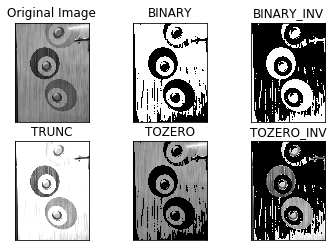

True

In [4]:
img = cv2.imread('/home/atharva/opencvf/test1.jpg',cv2.IMREAD_GRAYSCALE)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()
cv2.imwrite('/home/atharva/opencvf/results/test1thresh.png',thresh1)

# Adaptive Thresholding

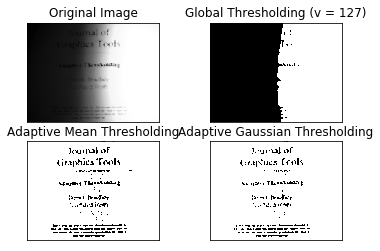

True

In [5]:
img = cv2.imread('/home/atharva/opencvf/thresh.jpg',cv2.IMREAD_GRAYSCALE)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,9,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,9,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()
cv2.imwrite('/home/atharva/opencvf/results/adpthresh.png',th3)

In [24]:
cv2.adaptiveThreshold?

# Otsu's Thresholding

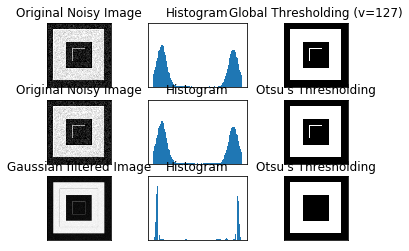

True

In [6]:
img = cv2.imread('/home/atharva/opencvf/bimodal.jpg',cv2.IMREAD_GRAYSCALE)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite('/home/atharva/opencvf/results/bithresh.png',th3)

## Resize

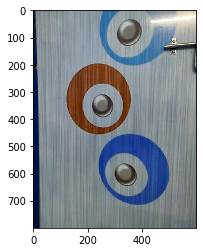

In [7]:
img = cv2.imread('/home/atharva/opencvf/test1.jpg')
res = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC) # scaling factor
#res = cv2.resize(img,(new_width, new_height), interpolation = cv2.INTER_CUBIC) # new size
plt.imshow(res)

## Translation

True

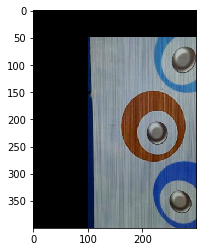

In [8]:
img = cv2.imread('/home/atharva/opencvf/test1.jpg')
rows,cols,c = img.shape
M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(dst)
cv2.imwrite('/home/atharva/opencvf/results/test1trans.png',dst)
# Here M is transformation matrix. For translation M=[(1,0,x); (0,1,y)]

## Rotation

True

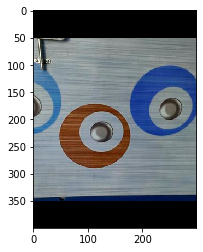

In [9]:
img = cv2.imread('/home/atharva/opencvf/test1.jpg')
rows,cols,c = img.shape
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)# args:1=point abt which rotate,2=angle,3=scale
dst = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(dst)
cv2.imwrite('/home/atharva/opencvf/results/test1rot.png',dst)

# Affine Transformation

In [10]:
img = cv2.imread('/home/atharva/opencvf/test1.jpg')

rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]]) #coord of 3 pts in input img
pts2 = np.float32([[10,100],[200,50],[100,250]])#coord of corres '
/3 pts in output img

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()
cv2.imwrite('/home/atharva/opencvf/results/test1affine.png',dst)

SyntaxError: invalid syntax (<ipython-input-10-ca74606ef7b6>, line 7)

# Prespective Transformation

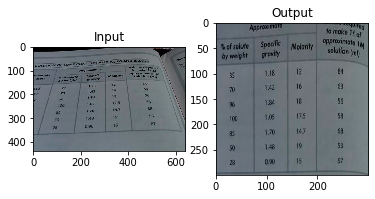

True

In [11]:
img = cv2.imread('/home/atharva/opencvf/pres.jpg')
rows,cols,ch = img.shape

pts1 = np.float32([[102,99],[22,373],[623,356],[532,86]])
pts2 = np.float32([[0,0],[0,300],[300,300],[300,0]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()
cv2.imwrite('/home/atharva/opencvf/results/prespective.png',dst)

In [12]:
cv2.filter2D?

# Smoothing Image

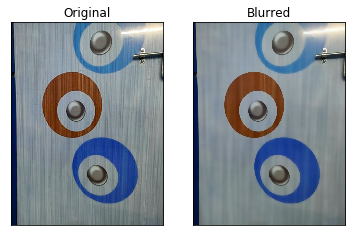

True

In [13]:
img = cv2.imread('/home/atharva/opencvf/test1.jpg')
#blur = cv2.blur(img,(5,5))
#blur = cv2.GaussianBlur(img,(5,5),0) #gaussian filter: src,(width,height),std dev
#blur = cv2.medianBlur(img,(5,5)) #median filter: src,size[used for filtering very noisy img]
blur = cv2.bilateralFilter(img,9,75,75) #bilateral filter: src,sigmaspace,sigmacolor [preserve edges]

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite('/home/atharva/opencvf/results/test1blur.png',blur)

In [64]:
cv2.bilateralFilter?